In [5]:
import pandas as pd
import re
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.gridspec as gridspec

In [1]:
# Read the FASTA file and check its contents

def read_fasta_file(file_path):
    """Read a FASTA file and return the sequences and their labels."""
    with open(file_path, 'r') as file:
        contents = file.read().strip().split('\n')
    
    sequences = {}
    label = ""
    for line in contents:
        if line.startswith('>'):
            label = line[1:].strip()
            sequences[label] = ""
        else:
            sequences[label] += line.strip()
    return sequences

In [2]:
def format_fasta(sequence, label):
    """Format the sequence as described."""
    # Calculate how many amino acids should be on each line
    amino_acids_per_line = len(sequence) // 9
    
    formatted_output = [label]
    index = 1
    for i in range(0, len(sequence), amino_acids_per_line):
        # Extract section of the sequence
        section = sequence[i:i+amino_acids_per_line]
        
        # Add sequence section to output
        formatted_output.append('\t'.join(section))
        
        # Add indices to output
        indices = [str(j) for j in range(index, index + len(section))]
        formatted_output.append('\t'.join(indices))
        
        index += len(section)
    return '\n'.join(formatted_output)

# Format the sequences
human_label = "Human"
bovine_label = "Bovine"
recom_label = "Recom"

formatted_human_sequence = format_fasta(fasta_contents['sp|P02788|TRFL_HUMAN Lactotransferrin OS=Homo sapiens OX=9606 GN=LTF PE=1 SV=6'], human_label)
formatted_bovine_sequence = format_fasta(fasta_contents['sp|P24627|TRFL_BOVIN Lactotransferrin OS=Bos taurus OX=9913 GN=LTF PE=1 SV=2'], bovine_label)
formatted_recom_sequence = format_fasta(fasta_contents['sp|P02788|TRFL_RECOM Lactotransferrin OS=Homo sapiens OX=9606 GN=LTF PE=1 SV=6'], recom_label)
#formatted_recom_sequence

In [6]:
def generate_interleaved_csv(human_sequence, bovine_sequence, recom_sequence):
    """Generate the interleaved CSV content with the latest modifications and include RECOM."""
    human_lines = human_sequence.split('\n')[1:]  # Skip the label
    bovine_lines = bovine_sequence.split('\n')[1:]
    recom_lines = recom_sequence.split('\n')[1:]
    
    csv_content = [[""]]  # Start with an empty row
    
    for h_line, b_line, r_line in zip(human_lines[::2], bovine_lines[::2], recom_lines[::2]):  # Only the amino acid lines
        h_amino_acids = h_line.split('\t')
        b_amino_acids = b_line.split('\t')
        r_amino_acids = r_line.split('\t')
        h_indices = human_lines[human_lines.index(h_line) + 1].split('\t')
        
        # Append rows to the CSV content with the latest modifications
        csv_content.append(["Bovine"] + b_amino_acids)
        csv_content.append(["Human"] + h_amino_acids)
        csv_content.append(["Recom"] + r_amino_acids)
        csv_content.append([""] + h_indices)
        csv_content.append([])  # Blank line after each set
    
    return csv_content

# Generate the interleaved CSV content with the latest modifications
interleaved_csv_content = generate_interleaved_csv(formatted_human_sequence, formatted_bovine_sequence, formatted_recom_sequence)

# Save the modified interleaved CSV content to a file
interleaved_csv_file_path = "interleaved_sequences.csv"
with open(interleaved_csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in interleaved_csv_content:
        writer.writerow(row)

import the fasta file and sequence for Lactoferrin

In [13]:
# Extract sequences from the provided FASTA contents
fasta_contents = read_fasta_file("LF.fasta")
human_sequence = fasta_contents['sp|P02788|TRFL_HUMAN Lactotransferrin OS=Homo sapiens OX=9606 GN=LTF PE=1 SV=6']
bovine_sequence = fasta_contents['sp|P24627|TRFL_BOVIN Lactotransferrin OS=Bos taurus OX=9913 GN=LTF PE=1 SV=2']
recom_sequence = fasta_contents['sp|P02788|TRFL_RECOM Lactotransferrin OS=Homo sapiens OX=9606 GN=LTF PE=1 SV=6']

import the fasta file and sequence for caseins

In [18]:
# Extract sequences from the provided FASTA contents
fasta_contents = read_fasta_file("CowMilkProteinDatabase_v4_shorter casein.fasta")
beta_a1_sequence = fasta_contents['sp|P02666A1|CASB_BOVIN Beta-casein OS=Bos taurus OX=9913 GN=CSN2 PE=1 SV=2']
beta_a2_sequence = fasta_contents['sp|P02666A2|CASB_BOVIN Beta-casein OS=Bos taurus GN=CSN2 PE=1 SV=2']
as1_a2_sequence = fasta_contents['sp|P02662|CASA1_BOVIN Alpha-S1-casein OS=Bos taurus GN=CSN1S1 PE=1 SV=2']
as2_a2_sequence = fasta_contents['sp|P02663|CASA2_BOVIN Alpha-S2-casein OS=Bos taurus OX=9913 GN=CSN1S2 PE=1 SV=2']
kapa_sequence = fasta_contents['sp|P02668|CASK_BOVIN Kappa-casein OS=Bos taurus OX=9913 GN=CSN3 PE=1 SV=1']

'RELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQTQSLVYPFPGPIPNSLPQNIPPLTQTPVVVPPFLQPEVMGVSKVKEAMAPKHKEMPFPKYPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLSQSKVLPVPQKAVPYPQRDMPIQAFLLYQEPVLGPVRGPFPIIV'

In [14]:
ms_data = pd.read_table('Kuhfeld_Bitter_Peptide_Reprocess-(1)_PeptideGroups.txt')
ms_data.head()

,Peptide Groups Peptide Group ID,Sequence,Master Protein Accessions,Positions in Proteins,Modifications,Theo MHplus in Da,Sequence Length,Quan Info,Abundances Normalized F11 Sample Extreme,Abundances Normalized F12 Sample Extreme,...,Abundance F6 Sample Low,Abundance F7 Sample Low,Abundance F8 Sample Moderate,Abundance F9 Sample Moderate,Abundance F10 Sample Moderate,Abundance F1 Sample Threshold,Abundance F2 Sample Threshold,Abundance F3 Sample Threshold,Abundance F4 Sample Threshold,Top Apex RT in min
0,392,AAIGQPSGELRL,P08037,P08037 [68-79],NaN,1211.67426,12,NaN,1.042669e+05,26727.724833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199399.515625,NaN,22.97
1,36676,PPKKNQDKTEIPTI,P02668,P02668 [109-122],NaN,1608.89555,14,NaN,1.179213e+05,445366.913614,...,7.890118e+05,1.768232e+05,247900.65625,195443.34375,NaN,NaN,3.526973e+06,183975.734375,588325.8125,11.22
2,36606,PPFLQPEVM,P02666A1; P02666A2,P02666A1 [85-93]; P02666A2 [85-93],NaN,1057.53868,9,NotUnique,1.196072e+05,114246.740386,...,NaN,6.719216e+04,NaN,NaN,263228.375,NaN,NaN,NaN,NaN,44.34
3,36229,PIVLNPWDQVKR,P02663,P02663 [103-114],NaN,1464.83216,12,NoQuanValues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34974,PFPKYPVEPF,P02666A1; P02666A2,P02666A1 [110-119]; P02666A2 [110-119],NaN,1220.63502,10,NotUnique,1.200132e+07,385881.666582,...,3.050965e+06,1.966036e+06,115436.28125,210378.28125,4220829.250,52156.792969,2.757631e+05,303476.406250,454178.5000,32.40


In [257]:
# Set AA counts
bovine_peptide_counts = [
    1, 1, 1, 2, 3, 3, 5, 6, 6, 6, 6, 6, 6, 6, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 2, 1, 0,
    0, 0, 0, 0, 0, 0, 2, 5, 9, 13, 15, 16, 20, 21, 21, 21, 21, 19, 20, 20, 24, 32, 50, 71, 85, 101, 106, 112,
    112, 112, 112, 109, 107, 100, 89, 83, 84, 81, 75, 73, 73, 73, 74, 76, 80, 89, 93, 91, 88, 90, 92, 92, 88,
    79, 72, 70, 60, 46, 37, 19, 13, 12, 7, 7, 7, 7, 8, 11, 19, 19, 19, 26, 29, 43, 58, 62, 70, 71, 72, 74, 74,
    68, 64, 60, 51, 31, 28, 18, 12, 9, 7, 13, 19, 25, 31, 34, 36, 39, 42, 44, 48, 47, 42, 38, 31, 25, 21, 21,
    19, 27, 35, 37, 37, 37, 38, 38, 38, 38, 38, 37, 31, 28, 25, 25, 25, 25, 24, 20, 19, 15, 13, 14, 15, 19, 21,
    27, 29, 29, 29, 29, 29, 28, 31, 35, 35, 33, 33, 33, 32, 33, 34, 34, 27, 25, 23, 15, 12, 14, 20, 25, 32, 36,
    42, 46, 50, 51, 47, 45, 38, 38, 33, 26, 17, 9, 6, 11, 12, 13, 14, 14, 14, 14, 12, 11, 8, 10, 10, 9, 9, 10,
    11, 12, 11, 11, 10, 9, 8, 6, 14, 25, 32, 35, 38, 39, 39, 38, 37, 35, 32, 26, 21, 16, 13, 11, 9, 5, 3, 2, 1,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 1, 3, 3, 8, 14, 21, 27, 30, 31, 34, 35, 38, 40, 34, 32, 29, 27, 22, 19, 13, 13, 7, 9, 11, 12, 12, 15, 15,
    16, 16, 14, 11, 11, 11, 11, 5, 5, 5, 5, 5, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1,
    1, 1, 0, 2, 3, 4, 4, 4, 5, 5, 5, 5, 3, 1, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 1, 4, 5, 5, 5, 5, 5, 5, 4, 2, 2,
    4, 4, 4, 7, 9, 11, 15, 16, 16, 16, 16, 16, 13, 13, 6, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 0, 0, 2, 4, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 7, 8, 9, 9, 9, 9, 8, 8, 6, 1, 1, 2,
    4, 6, 6, 7, 7, 7, 6, 6, 5,2, 3, 4, 4, 4, 5, 5, 5, 5, 3, 1, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 1, 4, 5, 5, 5, 5,
    4, 4, 4, 7, 9, 11, 15, 16, 16, 16, 16, 16, 13, 13, 6, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 0, 0, 2, 4, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 7, 8, 9, 9, 9, 9, 8, 8, 6, 1, 1, 2,
    4, 6, 6, 7, 7, 7, 6, 6, 5, 4, 4, 4, 1, 0, 0, 0, 2, 4, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 7, 8, 9, 9, 9, 9, 8, 8, 6, 1, 1, 2,
    4, 6, 6, 7, 7, 5, 5, 4, 2, 2, 7]

    
# Set human peptide counts in the opposite order

human_peptide_counts = bovine_peptide_counts[233:598] +bovine_peptide_counts[-345:] 
print(len(human_peptide_counts))
recom_peptide_counts = human_peptide_counts[375:710] + human_peptide_counts[0:375]
print(len(recom_peptide_counts))


710
710


In [259]:
#Set MS_data
bovine_ms_data= [
    2870765.05114889, 2870765.05114889, 2870765.05114889, 4927419.95539954,
    7259177.81070658, 7259177.81070658, 86683755.6719268, 369800852.419373,
    369800852.419373, 369800852.419373, 369800852.419373, 369800852.419373,
    369800852.419373, 369800852.419373, 1612433.73693613, 1612433.73693613,
    0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 3034884.61953474, 3034884.61953474,
    3034884.61953474, 17892352.5791464, 17892352.5791464, 17892352.5791464,
    17892352.5791464, 22844841.899017, 22844841.899017, 22844841.899017,
    33845811.1995726, 65589433.8485291, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
    0.0001, 0.0001, 47531311.1358616, 27029617.7627957, 42896393.2054191,
    122959982.949008, 294486797.050797, 324363177.026996, 644522518.591437,
    613855455.244163, 613855455.244163, 613855455.244163, 613855455.244163,
    670048416.517793, 3384488.08213349, 1488741.09062328, 837826.102566379,
    787913.067579958, 3045663.63440217, 7706443.01171372, 8756679.74581997,
    149150987.38552, 144188976.300315, 158634319.541321, 158634319.541321,
    158634319.541321, 158634319.541321, 161592195.103404, 164316504.048397,
    135181068.375419, 32397934.9924008, 22162390.357648, 21902906.854272,
    22681147.8250518, 24029767.1038352, 32769048.2888733, 32769048.2888733,
    32769048.2888733, 29486068.6429261, 17065159.032207, 16906355.560841,
    24969213.0759952, 24051424.7507201, 23576316.1762484, 20204672.2231269,
    24208738.3112897, 23930174.9224877, 23930174.9224877, 23333337.1675271,
    17409474.8787003, 14347851.7058612, 14649410.2040955, 14650131.6429375,
    4658884.74829465, 5159820.35800974, 1750804.69848776, 2132795.61369526,
    1941219.91536823, 2665990.31123204, 2665990.31123204, 2665990.31123204,
    2980132.47722385, 2674226.56094529, 3209365.94276991, 2974096.35181062,
    2974096.35181062, 2974096.35181062, 2909415.91505253, 2767328.92719823,
    4541562.93607679, 51493474.6986654, 50071345.4913106, 48581629.0881951,
    47921558.8731324, 47326654.2667062, 46566227.2516369, 46566227.2516369,
    24811639.7098156, 17904202.1693872, 17217587.7525298, 6687955.20920123,
    4381264.82921468, 4559025.42713129, 4642663.26404605, 1668627.49587625,
    1879295.79675519, 3996870.44555126, 3335703.79572281, 3431989.86115455,
    3187885.49527484, 3930848.28947257, 3677601.14171559, 3490809.63738676,
    4903558.57378635, 6118948.3482579, 6067790.55465995, 7028755.1981204,
    7175382.03279007, 7932701.13037389, 8723798.46207116, 8517402.48715075,
    8821764.92818936, 4068630.08013791, 3721493.54791573, 2388321.73532104, 2870765.05114889, 2870765.05114889, 4927419.95539954,
    7259177.81070658, 7259177.81070658, 86683755.6719268, 369800852.419373,
    369800852.419373, 369800852.419373, 369800852.419373, 369800852.419373,
    369800852.419373, 369800852.419373, 1612433.73693613, 1612433.73693613,
    0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 3034884.61953474, 3034884.61953474,
    3034884.61953474, 17892352.5791464, 17892352.5791464, 17892352.5791464,
    17892352.5791464, 22844841.899017, 22844841.899017, 22844841.899017,
    33845811.1995726, 65589433.8485291, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
    0.0001, 0.0001, 47531311.1358616, 27029617.7627957, 42896393.2054191,
    122959982.949008, 294486797.050797, 324363177.026996, 644522518.591437,
    613855455.244163, 613855455.244163, 613855455.244163, 613855455.244163,
    670048416.517793, 3384488.08213349, 1488741.09062328, 837826.102566379,
    787913.067579958, 3045663.63440217, 7706443.01171372, 8756679.74581997,
    149150987.38552, 144188976.300315, 158634319.541321, 158634319.541321,
    158634319.541321, 158634319.541321, 161592195.103404, 164316504.048397,
    135181068.375419, 32397934.9924008, 22162390.357648, 21902906.854272,
    22681147.8250518, 24029767.1038352, 32769048.2888733, 32769048.2888733,
    32769048.2888733, 29486068.6429261, 17065159.032207, 16906355.560841,
    24969213.0759952, 24051424.7507201, 23576316.1762484, 20204672.2231269,
    24208738.3112897, 23930174.9224877, 23930174.9224877, 23333337.1675271,
    17409474.8787003, 14347851.7058612, 14649410.2040955, 14650131.6429375,
    4658884.74829465, 5159820.35800974, 1750804.69848776, 2132795.61369526,
    1941219.91536823, 2665990.31123204, 2665990.31123204, 2665990.31123204,
    2980132.47722385, 2674226.56094529, 3209365.94276991, 2974096.35181062,
    2974096.35181062, 2974096.35181062, 2909415.91505253, 2767328.92719823,
    4541562.93607679, 51493474.6986654, 50071345.4913106, 48581629.0881951,
    47921558.8731324, 47326654.2667062, 46566227.2516369, 46566227.2516369,
    24811639.7098156, 17904202.1693872, 17217587.7525298, 6687955.20920123,
    4381264.82921468, 4559025.42713129, 4642663.26404605, 1668627.49587625,
    1879295.79675519, 3996870.44555126, 3335703.79572281, 3431989.86115455,
    3187885.49527484, 3930848.28947257, 3677601.14171559, 3490809.63738676,
    4903558.57378635, 6118948.3482579, 6067790.55465995, 7028755.1981204,
    7175382.03279007, 7932701.13037389, 8723798.46207116, 8517402.48715075,
    8821764.92818936, 4068630.08013791, 3721493.54791573, 2388321.73532104, 2870765.05114889, 2870765.05114889, 4927419.95539954,
    7259177.81070658, 7259177.81070658, 86683755.6719268, 369800852.419373,
    369800852.419373, 369800852.419373, 369800852.419373, 369800852.419373,
    369800852.419373, 369800852.419373, 1612433.73693613, 1612433.73693613,
    0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 3034884.61953474, 3034884.61953474,
    3034884.61953474, 17892352.5791464, 17892352.5791464, 17892352.5791464,
    17892352.5791464, 22844841.899017, 22844841.899017, 22844841.899017,
    33845811.1995726, 65589433.8485291, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
    0.0001, 0.0001, 47531311.1358616, 27029617.7627957, 42896393.2054191,
    122959982.949008, 294486797.050797, 324363177.026996, 644522518.591437,
    613855455.244163, 613855455.244163, 613855455.244163, 613855455.244163,
    670048416.517793, 3384488.08213349, 1488741.09062328, 837826.102566379,
    787913.067579958, 3045663.63440217, 7706443.01171372, 8756679.74581997,
    149150987.38552, 144188976.300315, 158634319.541321, 158634319.541321,
    158634319.541321, 158634319.541321, 161592195.103404, 164316504.048397,
    135181068.375419, 32397934.9924008, 22162390.357648, 21902906.854272,
    22681147.8250518, 24029767.1038352, 32769048.2888733, 32769048.2888733,
    32769048.2888733, 29486068.6429261, 17065159.032207, 16906355.560841,
    24969213.0759952, 24051424.7507201, 23576316.1762484, 20204672.2231269,
    24208738.3112897, 23930174.9224877, 23930174.9224877, 23333337.1675271,
    17409474.8787003, 14347851.7058612, 14649410.2040955, 14650131.6429375,
    4658884.74829465, 5159820.35800974, 1750804.69848776, 2132795.61369526,
    1941219.91536823, 2665990.31123204, 2665990.31123204, 2665990.31123204,
    2980132.47722385, 2674226.56094529, 3209365.94276991, 2974096.35181062,
    2974096.35181062, 2974096.35181062, 2909415.91505253, 2767328.92719823,
    4541562.93607679, 51493474.6986654, 50071345.4913106, 48581629.0881951,
    47921558.8731324, 47326654.2667062, 46566227.2516369, 46566227.2516369,
    24811639.7098156, 17904202.1693872, 17217587.7525298, 6687955.20920123,
    4381264.82921468, 4559025.42713129, 4642663.26404605, 1668627.49587625,
    1879295.79675519, 3996870.44555126, 3335703.79572281, 3431989.86115455,
    3187885.49527484, 3930848.28947257, 3677601.14171559, 3490809.63738676,
    4903558.57378635, 6118948.3482579, 6067790.55465995, 7028755.1981204,
    7175382.03279007, 7932701.13037389, 8723798.46207116, 8517402.48715075,
    8821764.92818936, 4068630.08013791, 3721493.54791573, 2388321.73532104, 2870765.05114889, 2870765.05114889, 4927419.95539954,
    7259177.81070658, 7259177.81070658, 86683755.6719268, 369800852.419373,
    369800852.419373, 369800852.419373, 369800852.419373, 369800852.419373,
    369800852.419373, 369800852.419373, 1612433.73693613, 1612433.73693613,
    0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 3034884.61953474, 3034884.61953474,
    3034884.61953474, 17892352.5791464, 17892352.5791464, 17892352.5791464,
    17892352.5791464, 22844841.899017, 22844841.899017, 22844841.899017,
    33845811.1995726, 65589433.8485291, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
    0.0001, 0.0001, 47531311.1358616, 27029617.7627957, 42896393.2054191,
    122959982.949008, 294486797.050797, 324363177.026996, 644522518.591437,
    613855455.244163, 613855455.244163, 613855455.244163, 613855455.244163,
    670048416.517793, 3384488.08213349, 1488741.09062328, 837826.102566379,
    787913.067579958, 3045663.63440217, 7706443.01171372, 8756679.74581997,
    149150987.38552, 144188976.300315, 158634319.541321, 158634319.541321,
    158634319.541321, 158634319.541321, 161592195.103404, 164316504.048397,
    135181068.375419, 32397934.9924008, 22162390.357648, 21902906.854272,
    22681147.8250518, 24029767.1038352, 32769048.2888733, 32769048.2888733,
    32769048.2888733, 29486068.6429261, 17065159.032207, 16906355.560841,
    24969213.0759952, 24051424.7507201, 23576316.1762484, 20204672.2231269,
    24208738.3112897, 23930174.9224877, 23930174.9224877, 23333337.1675271,
    17409474.8787003, 14347851.7058612, 14649410.2040955, 14650131.6429375,
    4658884.74829465, 5159820.35800974, 1750804.69848776, 2132795.61369526,
    1941219.91536823, 2665990.31123204, 2665990.31123204, 2665990.31123204,
    2980132.47722385, 2674226.56094529, 3209365.94276991, 2974096.35181062,
    2974096.35181062, 2974096.35181062, 2909415.91505253, 2767328.92719823,
    4541562.93607679, 51493474.6986654, 50071345.4913106, 48581629.0881951,
    47921558.8731324, 47326654.2667062, 46566227.2516369, 46566227.2516369,
    24811639.7098156, 17904202.1693872, 17217587.7525298, 6687955.20920123,
    4381264.82921468, 4559025.42713129, 4642663.26404605, 1668627.49587625,
    1879295.79675519, 3996870.44555126, 3335703.79572281, 3431989.86115455,
    3187885.49527484, 3930848.28947257, 3677601.14171559, 3490809.63738676,
    4903558.57378635, 6118948.3482579, 6067790.55465995, 7028755.1981204,
    7175382.03279007, 7932701.13037389, 8723798.46207116, 8517402.48715075,
    8821764.92818936, 4068630.08013791, 3721493.54791573, 2388321.73532104, 2870765.05114889, 2870765.05114889, 4927419.95539954,
    7259177.81070658, 7259177.81070658, 86683755.6719268, 369800852.419373,
    369800852.419373, 369800852.419373, 369800852.419373, 369800852.419373,
    369800852.419373, 369800852.419373, 1612433.73693613, 1612433.73693613,
    0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 3034884.61953474, 3034884.61953474,
    3034884.61953474, 17892352.5791464, 17892352.5791464, 17892352.5791464,
    17892352.5791464, 22844841.899017, 22844841.899017, 22844841.899017,
    33845811.1995726, 65589433.8485291, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
    0.0001, 0.0001, 47531311.1358616, 27029617.7627957, 42896393.2054191,
    122959982.949008, 294486797.050797, 324363177.026996, 644522518.591437,
    613855455.244163, 613855455.244163, 613855455.244163, 613855455.244163,
    670048416.517793, 3384488.08213349, 1488741.09062328, 837826.102566379,
    787913.067579958, 3045663.63440217, 7706443.01171372, 8756679.74581997,
    149150987.38552, 144188976.300315, 158634319.541321, 158634319.541321,
    158634319.541321, 158634319.541321, 161592195.103404, 164316504.048397,
    135181068.375419, 32397934.9924008, 22162390.357648, 21902906.854272,
    22681147.8250518, 24029767.1038352, 32769048.2888733, 32769048.2888733,
    32769048.2888733, 29486068.6429261, 17065159.032207, 16906355.560841,
    24969213.0759952, 24051424.7507201, 23576316.1762484, 20204672.2231269,
    24208738.3112897, 23930174.9224877, 23930174.9224877, 23333337.1675271,
    17409474.8787003, 14347851.7058612, 14649410.2040955, 14650131.6429375,
    4658884.74829465, 5159820.35800974, 1750804.69848776, 2132795.61369526,
    1941219.91536823, 2665990.31123204, 2665990.31123204, 2665990.31123204,
    2980132.47722385, 2674226.56094529, 3209365.94276991, 2974096.35181062,
    2974096.35181062, 2974096.35181062, 2909415.91505253, 2767328.92719823,
    4541562.93607679, 51493474.6986654, 50071345.4913106, 48581629.0881951,
    47921558.8731324, 47326654.2667062, 46566227.2516369, 46566227.2516369,
    24811639.7098156, 17904202.1693872, 17217587.7525298, 6687955.20920123,
    4381264.82921468, 4559025.42713129, 4642663.26404605, 1668627.49587625,
    1879295.79675519, 3996870.44555126, 3335703.79572281, 3431989.86115455,
    3187885.49527484, 3930848.28947257, 3677601.14171559, 3490809.63738676,
    4903558.57378635, 6118948.3482579, 6067790.55465995, 7028755.1981204,
    7175382.03279007, 7932701.13037389, 8723798.46207116, 8517402.48715075,
    8821764.92818936]
    


# Set human peptide counts in the opposite order
human_ms_data = bovine_ms_data[233:598] + bovine_ms_data[-345:] 
print(len(human_ms_data))
recom_ms_data = human_ms_data[375:710] + human_ms_data[0:375]
print(len(recom_ms_data))


710
710


In [10]:
# Given the sequences are long, we'll chunk them for visualization
chunk_size = 78
bovine_amino_acids_chunks = [bovine_sequence[i:i+chunk_size] for i in range(0, len(bovine_sequence), chunk_size)]
human_amino_acids_chunks = [human_sequence[i:i+chunk_size] for i in range(0, len(human_sequence), chunk_size)]
recom_amino_acids_chunks = [recom_sequence[i:i+chunk_size] for i in range(0, len(recom_sequence), chunk_size)]

bovine_peptide_counts_chunks = [bovine_peptide_counts[i:i+chunk_size] for i in range(0, len(bovine_peptide_counts), chunk_size)]
human_peptide_counts_chunks = [human_peptide_counts[i:i+chunk_size] for i in range(0, len(human_peptide_counts), chunk_size)]
recom_peptide_counts_chunks = [recom_peptide_counts[i:i+chunk_size] for i in range(0, len(recom_peptide_counts), chunk_size)]

bovine_ms_data_chunks = [bovine_ms_data[i:i+chunk_size] for i in range(0, len(bovine_sequence), chunk_size)]
human_ms_data_chunks = [human_ms_data[i:i+chunk_size] for i in range(0, len(human_sequence), chunk_size)]
recom_ms_data_chunks = [recom_ms_data[i:i+chunk_size] for i in range(0, len(recom_sequence), chunk_size)]

bovine_ms_data_list = list(bovine_ms_data)
human_ms_data_list = list(human_ms_data)
recom_ms_data_list = list(recom_ms_data)


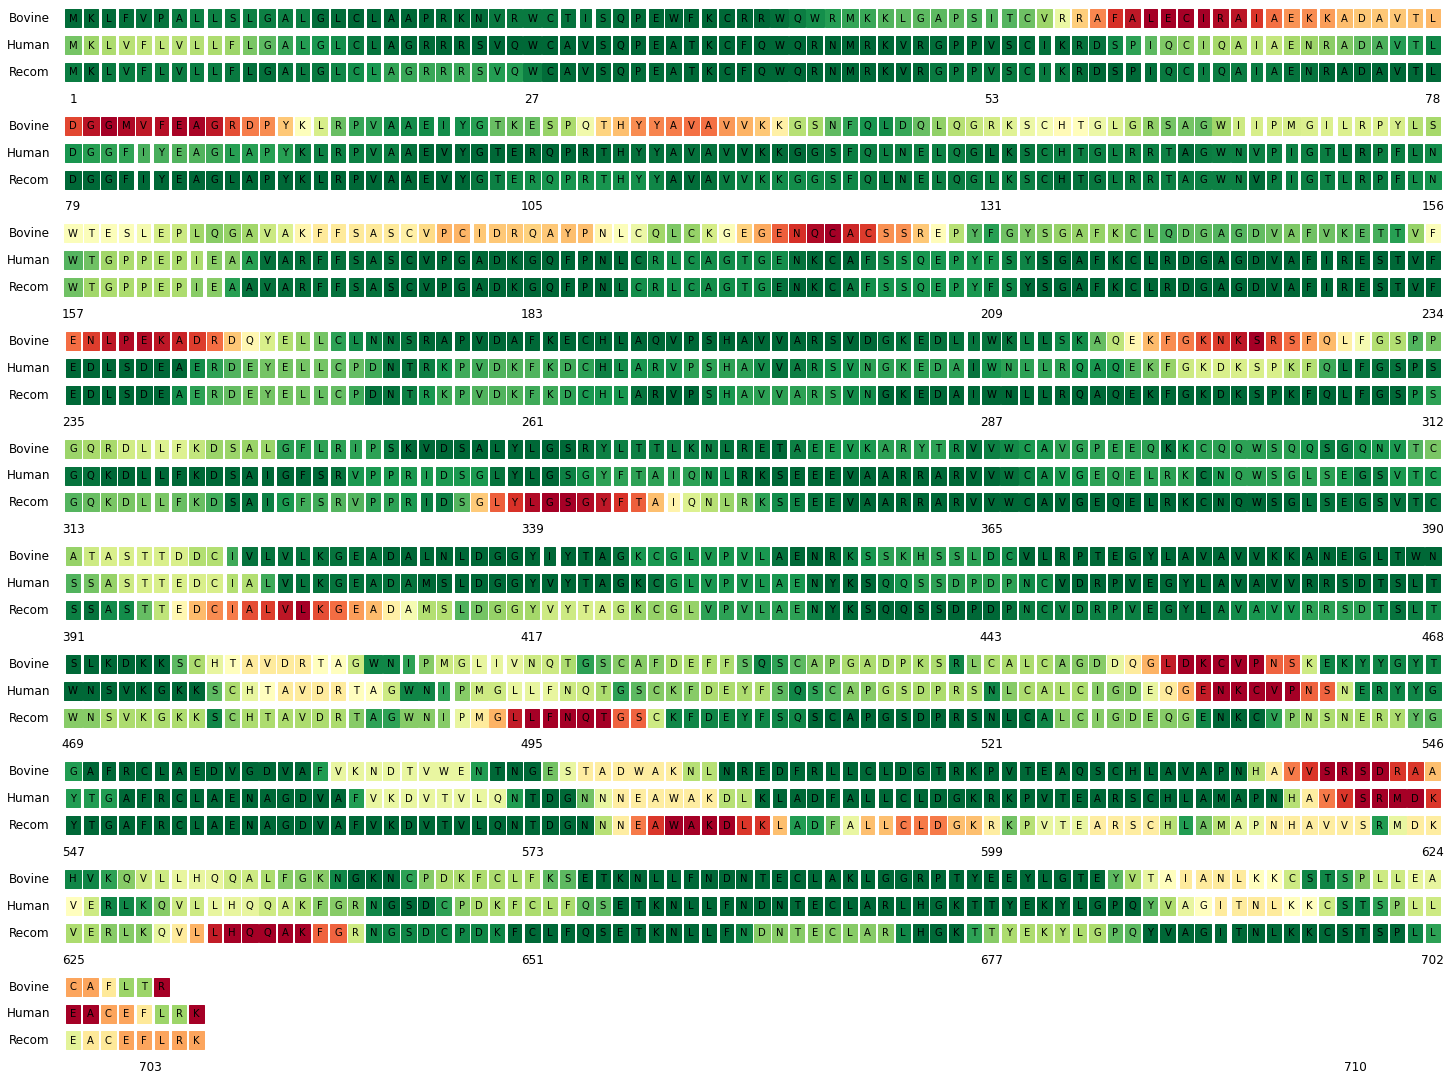

In [260]:
def visualize_sequence_heatmap_v22(bovine_amino_acids_list, bovine_peptide_counts_list, 
                                   human_amino_acids_list, human_peptide_counts_list,
                                   recom_amino_acids_list, recom_peptide_counts_list):

    """Visualize the amino acid sequence with further refined position number display."""
    
    num_sets = len(bovine_amino_acids_list)
    cmap = plt.cm.RdYlGn_r
    fig, axes = plt.subplots(num_sets * 4, 1, figsize=(20, num_sets * 1.5))  # Adjusted figure height for reduced gap
    
    total_count = 0  # Count the total amino acids processed

    for i in range(num_sets):
        bovine_amino_acids = bovine_amino_acids_list[i]
        human_amino_acids = human_amino_acids_list[i]
        recom_amino_acids = recom_amino_acids_list[i]
        bovine_counts = bovine_peptide_counts_list[i]
        human_counts = human_peptide_counts_list[i]
        recom_counts = recom_peptide_counts_list[i]

        max_count = max(max(bovine_counts), max(human_counts), max(recom_counts))
        
        # Function to get colors
        def get_colors(counts):
            if max_count == 0:
                return [cmap(0) for _ in counts]
            else:
                return [cmap(count / max_count) for count in counts]
        
        bovine_colors = get_colors(bovine_counts)
        human_colors = get_colors(human_counts)
        recom_colors = get_colors(recom_counts)
        
        # Function to plot a row of amino acids
        def plot_row(ax, amino_acids, colors, label):
            ax.axis('off')
            ax.set_xlim(0, 78)
            for j, (aa, color) in enumerate(zip(amino_acids, colors)):
                ax.text(j + 0.5, 0.5, aa, color='black', ha='center', va='center', fontsize=10, backgroundcolor=mcolors.rgb2hex(color))
            ax.text(-2, 0.5, label, ha='center', va='center', fontsize=12)
        
        # Plot bovine
        ax = axes[4*i]
        plot_row(ax, bovine_amino_acids, bovine_colors, 'Bovine')
        
        # Plot human
        ax = axes[4*i + 1]
        plot_row(ax, human_amino_acids, human_colors, 'Human')
        
        # Plot recom
        ax = axes[4*i + 2]
        plot_row(ax, recom_amino_acids, recom_colors, 'Recom')
        
        # Plot indices
        ax = axes[4*i + 3]
        ax.axis('off')
        ax.set_xlim(0, len(human_amino_acids))
        seq_length = len(human_amino_acids)
        if i < num_sets - 1:
            indices = [0, seq_length // 3, 2 * seq_length // 3, seq_length - 1]
        else:
            indices = [0, seq_length - 1]
        for idx in indices:
            ax.text(idx + 0.5, 0.5, str(total_count + idx + 1), ha='center', va='center', fontsize=12)  # Increased font size
        total_count += seq_length

    plt.tight_layout(pad=0.4)  # Reduced padding for smaller gaps
    plt.show()

# Return the function for reference
visualize_sequence_heatmap_v22
visualize_sequence_heatmap_v22(
    bovine_amino_acids_chunks, 
    bovine_peptide_counts_chunks,
    human_amino_acids_chunks, 
    human_peptide_counts_chunks,
    recom_amino_acids_chunks, 
    recom_peptide_counts_chunks,    
)

C:\Users\kuhfeldr\AppData\Local\Temp/ipykernel_16516/2549508274.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


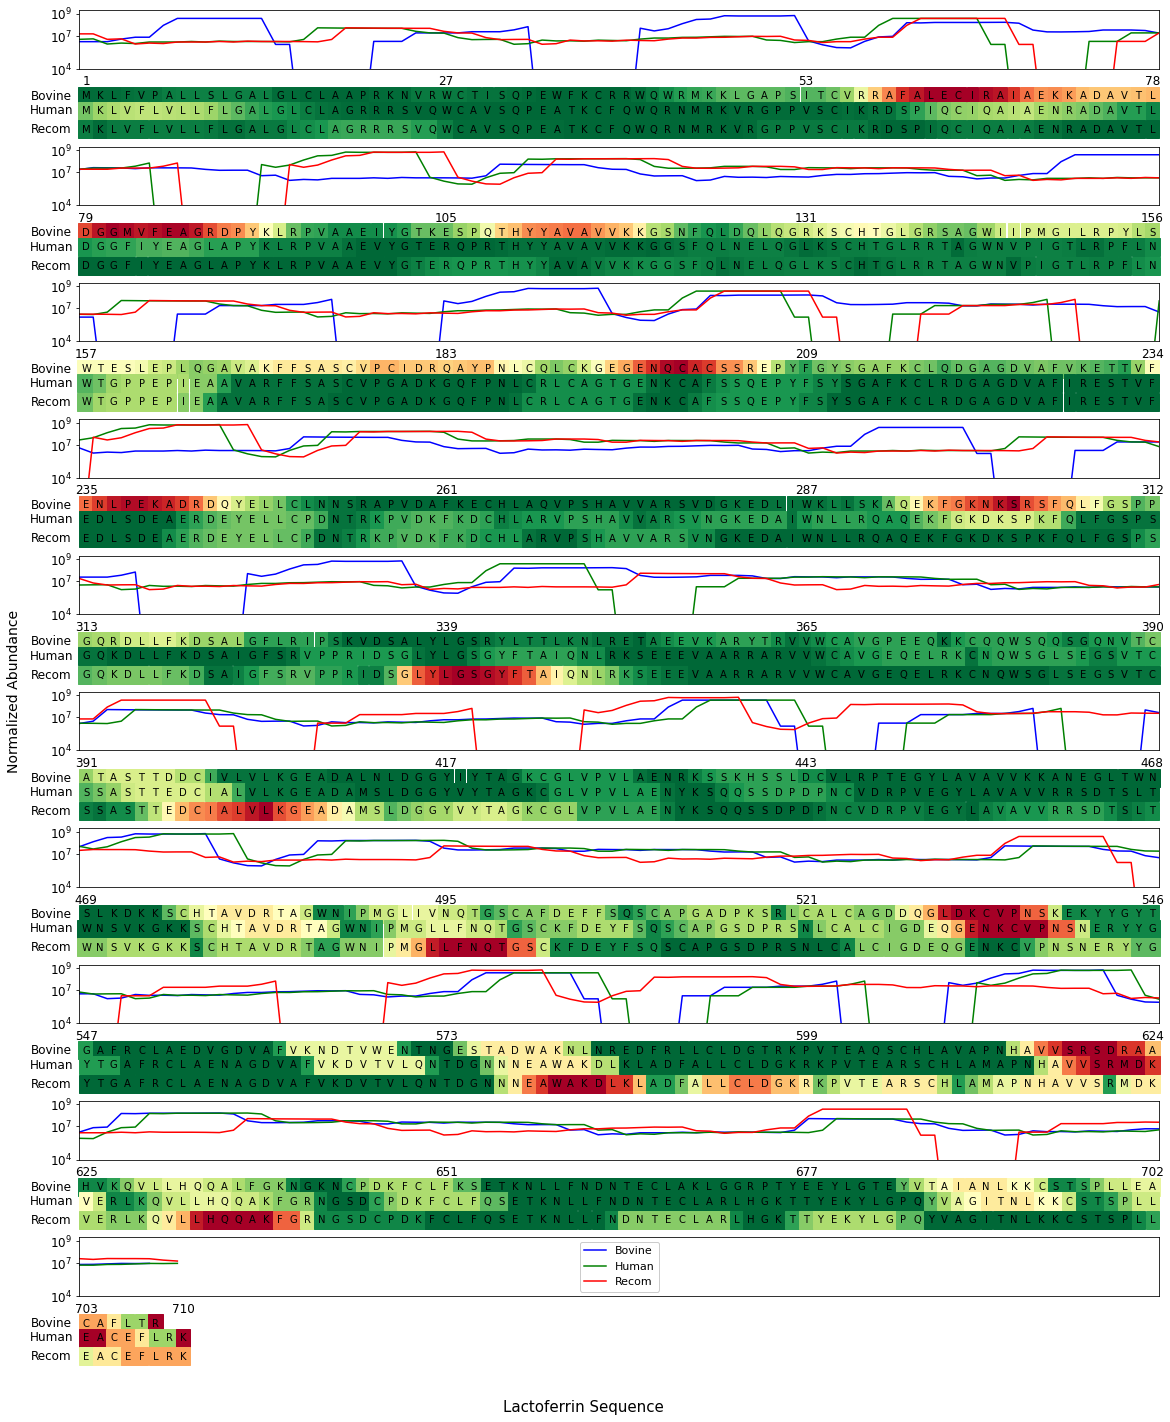

In [261]:
def visualize_sequence_heatmap_with_lineplot(bovine_amino_acids_list, bovine_peptide_counts_list, 
                                             human_amino_acids_list, human_peptide_counts_list,
                                             recom_amino_acids_list, recom_peptide_counts_list,
                                             bovine_ms_data_list, human_ms_data_list, recom_ms_data_list,
                                             amino_acid_ratio, lineplot_ratio, indices_ratio):

    num_sets = len(bovine_amino_acids_list)
    cmap = plt.cm.RdYlGn_r
    
    # Adjust these values to change the relative heights based on input ratios
    height_ratios = [lineplot_ratio] + [amino_acid_ratio] * 3 + [indices_ratio]
    height_ratios = height_ratios * num_sets

    fig, axes = plt.subplots(num_sets * 5, 1, figsize=(20, num_sets * (lineplot_ratio + amino_acid_ratio * 3 + indices_ratio)*.25), 
                             gridspec_kw={'height_ratios': height_ratios, 'hspace': 0.7})

    max_data_length = max([len(data) for data in bovine_ms_data_list + human_ms_data_list + recom_ms_data_list])
    max_sequence_length = max([len(seq) for seq in bovine_amino_acids_list + human_amino_acids_list + recom_amino_acids_list])

    total_count = 0  # Count the total amino acids processed
    for i in range(num_sets):
        
        bovine_amino_acids = bovine_amino_acids_list[i]
        human_amino_acids = human_amino_acids_list[i]
        recom_amino_acids = recom_amino_acids_list[i]
        bovine_counts = bovine_peptide_counts_list[i]
        human_counts = human_peptide_counts_list[i]
        recom_counts = recom_peptide_counts_list[i]

        bovine_ms_data = bovine_ms_data_list[i]
        human_ms_data = human_ms_data_list[i]
        recom_ms_data = recom_ms_data_list[i]
        
        max_len = max(len(human_amino_acids), len(bovine_amino_acids), len(recom_amino_acids))
        lineplt_x_values_bovine = np.arange(0, len(bovine_ms_data))
        lineplt_x_values_human = np.arange(0, len(human_ms_data))
        lineplt_x_values_recom = np.arange(0, len(recom_ms_data))
        max_count = max(max(bovine_counts), max(human_counts), max(recom_counts))
        
        # Find the maximum length of amino acid sequences across all sets
        max_sequence_length = max([len(seq) for seq in bovine_amino_acids_list + human_amino_acids_list + recom_amino_acids_list])

        def get_colors(counts):
            if max_count == 0:
                return [cmap(0) for _ in counts]
            else:
                return [cmap(count / max_count) for count in counts]
        
        bovine_colors = get_colors(bovine_counts)
        human_colors = get_colors(human_counts)
        recom_colors = get_colors(recom_counts)
        
        def plot_row(ax, amino_acids, colors, label):
            ax.axis('off')
            ax.set_xlim(0, max_sequence_length)
            for j, (aa, color) in enumerate(zip(amino_acids, colors)):
                ax.text(j + 0.5, 0.5, aa, color='black', ha='center', va='center', fontsize=10, backgroundcolor=mcolors.rgb2hex(color))
            ax.text(-2, 0.5, label, ha='center', va='center', fontsize=12)

        # Create secondary axes to overlay the line plots on top of the heatmap
        ax1 = axes[5*i]
        ax1.axis('off')
        ax2 = ax1.twinx()  # Create a twin y-axis
        
        # Plot the MS data as a line plot on the secondary axis
        ax2.plot(lineplt_x_values_bovine,bovine_ms_data, label='Bovine', color='blue')
        ax2.plot(lineplt_x_values_human,human_ms_data, label='Human', color='green')
        ax2.plot(lineplt_x_values_recom,recom_ms_data, label='Recom', color='red')
        # Determine the maximum x-axis limit based on the lengths of the ms_data lists
        # Now, use this value when setting the x-axis limits for all plots:
        # For the line plot:
        ax2.set_xlim(0, max_sequence_length-1)
        ax2.set_ylim(10**4,2*10**9)
        ax2.set_yscale("log")  # Setting y-axis to log scale, as the values vary over several orders of magnitude
        ax2.set_yticks([10**4, 10**7, 10**9])  # Set y-ticks at specific locations
        ax2.tick_params(axis='y', labelsize=12)  # Adjust font size for y-ticks

        #ax2.get_yaxis().set_major_formatter(plt.ScalarFormatter())  # To format tick labels as scalars rather than in scientific notation
        ax2.yaxis.tick_left()
        if i == (num_sets-1):
            legend = ax2.legend(loc='center', fontsize=11)
            legend.get_frame().set_facecolor('white')
            legend.get_frame().set_alpha(1.0)  

        # Plot indices
        ax = axes[5*i + 1]
        ax.axis('off')
        # Adjust the x-axis limit for all plots
        ax.set_xlim(0, max_sequence_length)
        
        if i < num_sets - 1:
            indices = [0, max_len // 3, 2 * max_len // 3, max_len - 1]
        else:
            indices = [0, max_len - 1]
        for idx in indices:
            ax.text(idx + 0.5, 0.5, str(total_count + idx + 1), ha='center', va='center', fontsize=12)
        total_count += max_len
        
        # Plot bovine
        ax = axes[5*i + 2]
        plot_row(ax, bovine_amino_acids, bovine_colors, '')
        ax.text(-2, 0.5, 'Bovine', ha='center', va='center', fontsize=12)

        # Plot human
        ax = axes[5*i + 3]
        plot_row(ax, human_amino_acids, human_colors, '')
        ax.text(-2, 0.5, 'Human', ha='center', va='center', fontsize=12)

        # Plot recom
        ax = axes[5*i + 4]
        plot_row(ax, recom_amino_acids, recom_colors, '')
        ax.text(-2, 0.5, 'Recom', ha='center', va='center', fontsize=12)


                    
    plt.tight_layout()
    
    plt.subplots_adjust(left=0.15)  # Create space on the left for the y-label
    fig.text(0.1, 0.5, 'Normalized Abundance', va='center', rotation='vertical', fontsize=14)
    fig.text(0.5, 0.1, 'Lactoferrin Sequence', ha='center', va='center', fontsize=15)

    plt.show()


visualize_sequence_heatmap_with_lineplot(
    bovine_amino_acids_chunks, 
    bovine_peptide_counts_chunks,
    human_amino_acids_chunks, 
    human_peptide_counts_chunks,
    recom_amino_acids_chunks, 
    recom_peptide_counts_chunks,
    bovine_ms_data_chunks,     
    human_ms_data_chunks,        
    recom_ms_data_chunks,
    #amino_acid_ratio=.5, lineplot_ratio=10, indices_ratio=1
    amino_acid_ratio=.4, lineplot_ratio=7.25, indices_ratio=1.5

)